In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

df = pd.read_csv('Spotify_Youtube.csv')

# Sample 10% of the data
sampled_data = df.sample(frac=0.1)

df['Danceability'].fillna(df['Danceability'].mean(), inplace=True)

df.drop_duplicates(subset='Track', keep='first', inplace=True)

selected_columns = df[['Track', 'Artist', 'Danceability', 'Energy']]

df['DanceEnergyRatio'] = df['Danceability'] / df['Energy']

# Discretize a column into intervals
bins = [0, 0.5, 1, 2]
df['DanceabilityCategory'] = pd.cut(df['Danceability'], bins)

numerical_columns = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Tempo']

z_scores = df[numerical_columns].apply(zscore)

threshold = 1
outliers = df[(z_scores > threshold).any(axis=1)]

print("Outliers:")
print(outliers)

Outliers:
       Unnamed: 0       Artist  \
0               0     Gorillaz   
20             20      50 Cent   
25             25      50 Cent   
27             27      50 Cent   
28             28      50 Cent   
...           ...          ...   
20667       20667     NewJeans   
20688       20688    Jung Kook   
20689       20689  LE SSERAFIM   
20690       20690  LE SSERAFIM   
20694       20694  LE SSERAFIM   

                                             Url_spotify  \
0      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
20     https://open.spotify.com/artist/3q7HBObVc0L8jN...   
25     https://open.spotify.com/artist/3q7HBObVc0L8jN...   
27     https://open.spotify.com/artist/3q7HBObVc0L8jN...   
28     https://open.spotify.com/artist/3q7HBObVc0L8jN...   
...                                                  ...   
20667  https://open.spotify.com/artist/6HvZYsbFfjnjFr...   
20688  https://open.spotify.com/artist/6HaGTQPmzraVma...   
20689  https://open.spotify.com/artist/4S

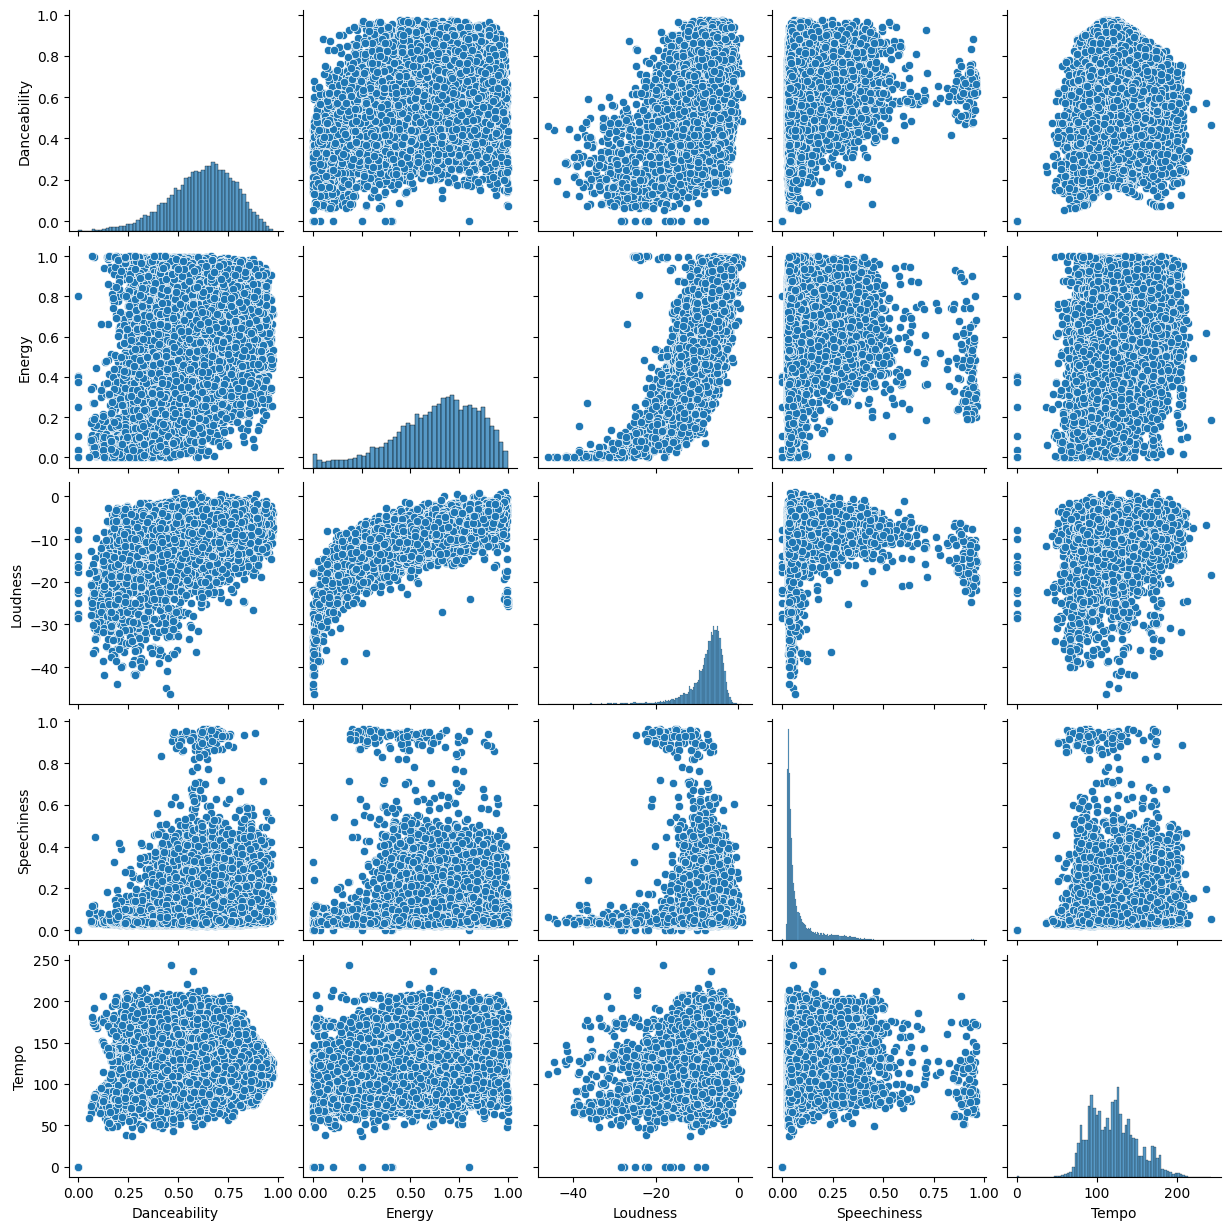

In [12]:
# Summary statistics
summary_stats = df.describe()

# Multivariate Analysis (Example: Pairplot)

sns.pairplot(df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Tempo']])
plt.show()